## Modify icedraft getz shelf (make similar to Grenoble version)

In [11]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmocean

In [2]:
base_dir = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/'

In [82]:
my_domcfg    = xr.open_dataset(f'{base_dir}bathymetry/domain_cfg-20240305.nc')
my_meshmask  = xr.open_dataset(f'{base_dir}bathymetry/mesh_mask-20240305.nc')
IGE_domcfg   = xr.open_dataset(f'{base_dir}eANT025-orig/domain_cfg_eANT025.L121.nc')
IGE_meshmask = xr.open_dataset(f'{base_dir}eANT025-orig/mesh_mask_eANT025.L121.nc')
new_domcfg   = my_domcfg.copy()
new_meshmask = my_meshmask.copy()

In [76]:
# simple test domain_cfg:
getz_region   = np.zeros(my_domcfg.isf_draft.isel(y=slice(0,439)).values.shape)
getz_region[200:260,605:689] = 1

for var in ['isf_draft', 'top_level']:
    new_var = xr.where(getz_region==1, IGE_domcfg[var], my_domcfg[var].isel(y=slice(0,439)))
    new_var = xr.concat([new_var, my_domcfg[var].isel(y=slice(439,None))], dim='y')
    
    new_domcfg[var] = new_var

for var in ['tmask','misf','isf_draft','mhw','hw']:
    new_var = xr.where(getz_region==1, IGE_meshmask[var], my_meshmask[var].isel(y=slice(0,439)))
    new_var = xr.concat([new_var, my_meshmask[var].isel(y=slice(439,None))], dim='y')
    
    new_meshmask[var] = new_var

In [77]:
new_domcfg.to_netcdf(f'{base_dir}bathymetry/domain_cfg-20240305-deep-getz.nc')
new_meshmask.to_netcdf(f'{base_dir}bathymetry/mesh_mask-20240305-deep-getz.nc')

Fill initial conditions:

In [73]:
my_icsT = xr.open_dataset(f'{base_dir}initial-conditions/SOSE-ConsTemp-initial-conditions-20240507.nc').squeeze()
my_icsS = xr.open_dataset(f'{base_dir}initial-conditions/SOSE-AbsSal-initial-conditions-20240507.nc').squeeze()

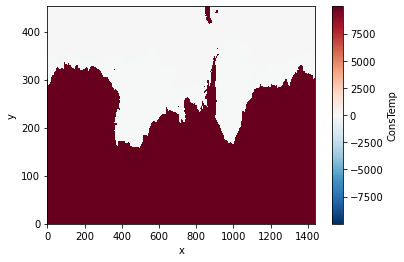

In [78]:
# simplest thing is to just fill everywhere that is ocean in IGE meshmask and everywhere that is ocean in my mask,
# rather than messing around with creating a new tmask